In [1]:
import pandas as pd

df = pd.read_csv("heart_cleveland_upload.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [2]:
print ("1. analisis exploratorio de datos")

1. analisis exploratorio de datos


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       29

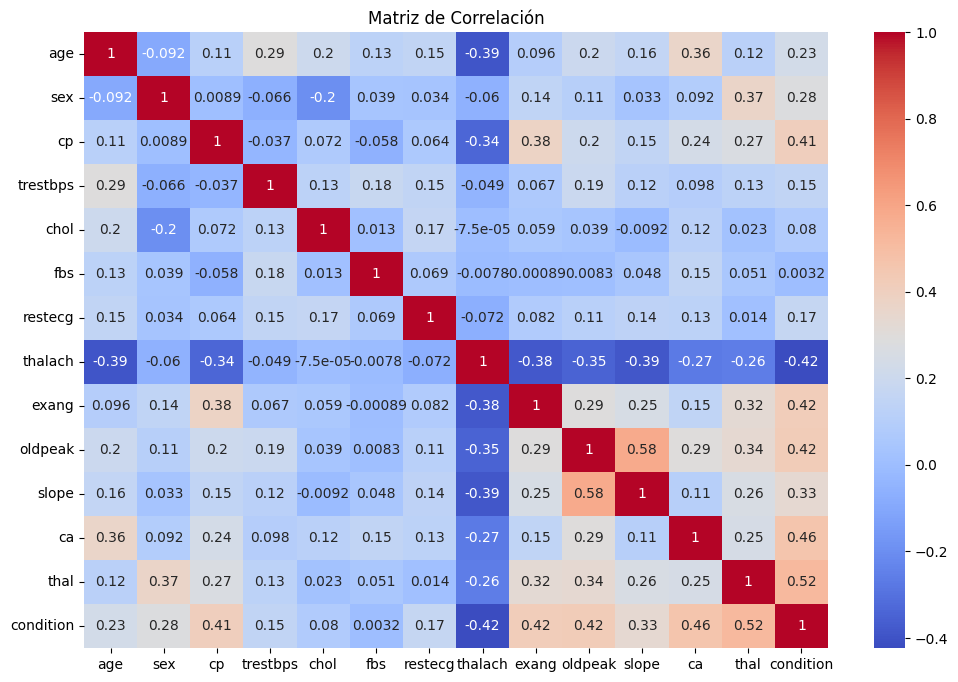

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("heart_cleveland_upload.csv")

# Ver las primeras filas
print(df.head())

# Información general
print(df.info())

# Estadísticas descriptivas
print(df.describe())

# Conteo de la variable objetivo
print(df['condition'].value_counts())

# Mapa de calor de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [5]:
print ("2. preprocesamiento de datos")

2. preprocesamiento de datos


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar características y variable objetivo
X = df.drop("condition", axis=1)
y = df["condition"]

# Escalar características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (237, 13)
Tamaño de X_test: (60, 13)
Tamaño de y_train: (237,)
Tamaño de y_test: (60,)


In [8]:
print ("3. seleccion de caracteristicas")

3. seleccion de caracteristicas


In [9]:
from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar las 8 mejores características
selector = SelectKBest(score_func=f_classif, k=8)
X_selected = selector.fit_transform(X_scaled, y)

In [10]:
# Obtener las columnas seleccionadas
selected_columns = X.columns[selector.get_support()]
print("Características seleccionadas:", list(selected_columns))

Características seleccionadas: ['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [11]:
print ("division del data set en train y test")

division del data set en train y test


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)
print("Distribución de clases en entrenamiento:", y_train.value_counts(normalize=True))
print("Distribución de clases en prueba:", y_test.value_counts(normalize=True))

Tamaño del conjunto de entrenamiento: (237, 8)
Tamaño del conjunto de prueba: (60, 8)
Distribución de clases en entrenamiento: condition
0    0.540084
1    0.459916
Name: proportion, dtype: float64
Distribución de clases en prueba: condition
0    0.533333
1    0.466667
Name: proportion, dtype: float64


In [14]:
print ("5. entrenamiento del modelo y ajuste de hiperparametros")

5. entrenamiento del modelo y ajuste de hiperparametros


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
log_reg = LogisticRegression(max_iter=1000)

# Rango de valores de C a probar
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Validación cruzada con GridSearch
grid = GridSearchCV(log_reg, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [16]:
print("Mejores parámetros encontrados:", grid.best_params_)
print("Mejor modelo:", grid.best_estimator_)

Mejores parámetros encontrados: {'C': 0.01}
Mejor modelo: LogisticRegression(C=0.01, max_iter=1000)


In [17]:
print ("6. evaluacion de desempeño")

6. evaluacion de desempeño


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Predicciones
y_pred = grid.predict(X_test)

In [19]:
# Reporte detallado
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# F1 Score general
print("F1 Score:", f1_score(y_test, y_pred))

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89        32
           1       1.00      0.71      0.83        28

    accuracy                           0.87        60
   macro avg       0.90      0.86      0.86        60
weighted avg       0.89      0.87      0.86        60

F1 Score: 0.8333333333333334


In [20]:
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

Matriz de confusión:
 [[32  0]
 [ 8 20]]


In [21]:
print ("7. visualizar resultados")

7. visualizar resultados


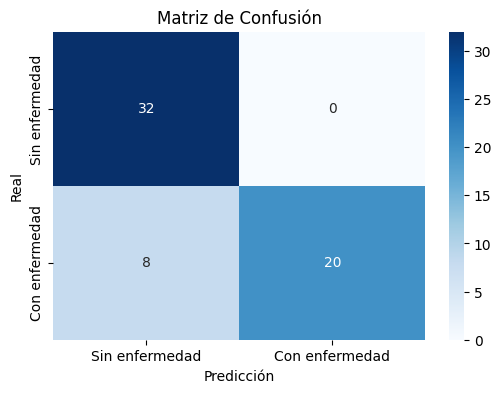

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generar matriz
cm = confusion_matrix(y_test, y_pred)

# Visualizarla
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sin enfermedad', 'Con enfermedad'], yticklabels=['Sin enfermedad', 'Con enfermedad'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

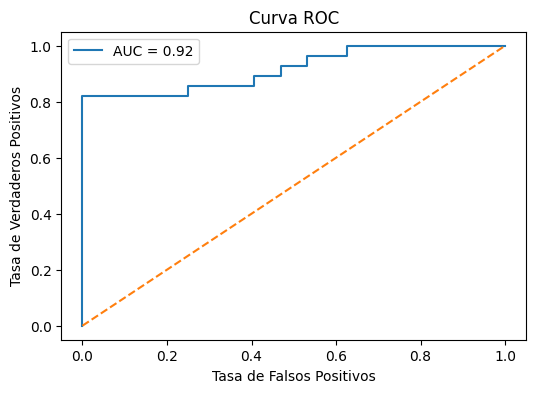

In [23]:
from sklearn.metrics import roc_curve, auc

# Obtener probabilidades para la clase positiva
y_proba = grid.predict_proba(X_test)[:, 1]

# Calcular valores de la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Dibujar la curva
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [24]:
print ("8. interpretación y análisis de datos")

8. interpretación y análisis de datos


In [29]:
print("Desempeño general del modelo")

print ("F1 Score = 0.83: buen equilibrio entre precisión y recall.")
print ("AUC = 0.92: excelente capacidad discriminativa.")

print ("Matriz de confusión:")

print ("0 falsos positivos (ningún sano fue mal diagnosticado).")

print ("8 falsos negativos (algunos enfermos fueron clasificados como sanos, lo cual es clínicamente importante).")

Desempeño general del modelo
F1 Score = 0.83: buen equilibrio entre precisión y recall.
AUC = 0.92: excelente capacidad discriminativa.
Matriz de confusión:
0 falsos positivos (ningún sano fue mal diagnosticado).
8 falsos negativos (algunos enfermos fueron clasificados como sanos, lo cual es clínicamente importante).
